# Ejemplo 2: algoritmo descenso del gradiente para entrenar un modelo de regresión lineal

$$ min\hspace{0.1cm}J(w,b) = \frac{1}{2m}\sum^{m-1}_{i=0}(f_{w,b}(x_i)-y_i)^2$$

Donde:

$f_{w,b}(x_i) = w\cdot x_i + b $

Algoritmo descenso del gradiente.

- **Paso 1:** elegir los valores inciales $w$ y $b$
- **Paso 2:** actualizar valores de $w$ y $b$ mediante el descenso del gradiente:

$$ w = w-\alpha\cdot\frac{\partial J(w,b)}{\partial w}$$

$$ b = b-\alpha\cdot\frac{\partial J(w,b)}{\partial b}$$

- **Paso 3**: repetir 2 hasta convergencia.

La expresiones análiticas del gradiente para una regresión lineal están dadas por:

$$ \frac{\partial J(w,b)}{\partial w} = \frac{1}{m}\sum^{m-1}_{i=0}(f_{w,b}(x_i)-y_i)\cdot x_i$$

$$ \frac{\partial J(w,b)}{\partial b} = \frac{1}{m}\sum^{m-1}_{i=0}(f_{w,b}(x_i)-y_i)$$

- $\alpha$ es la tasa o razón de aprendizaje (learning rate).

In [1]:
# importación de librerias
import pandas as pd #importación de datos y menejo de dataframes
import matplotlib.pyplot as plt # visualización de datos
from matplotlib import cm
import numpy as np # mannejo de arrays
import math
from sklearn.model_selection import train_test_split # función de la liberia scikit learn que permite dividir los datos en train/test
%matplotlib widget

## Definición del problema

Vamos a utilizar un ejemplo motivador para la predicicón de sueldo de un profesional a partir de sus años de experiencia. El conjunto de datos tiene dos variables: `YearsExperience` y `Salary` con los cuales vamos a construir un modelo de regresión lineal. 

In [2]:
# importación de los datos
data = pd.read_csv('salary_data.csv')

In [3]:
# visualización de los primeros datos
data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# verificación de valores faltantes tipo Nan o Null
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

Text(0, 0.5, 'Salary')

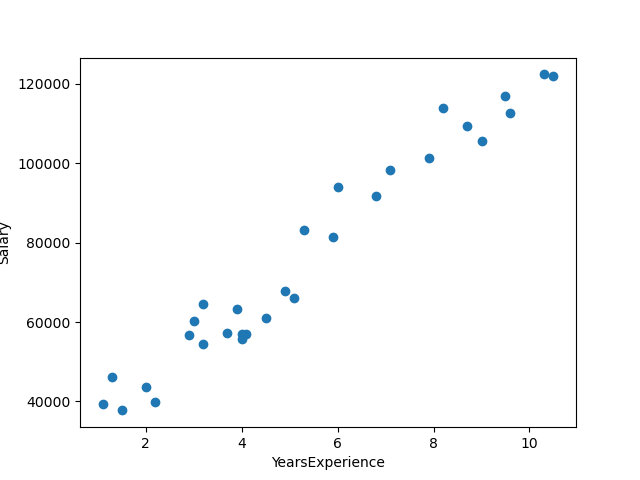

In [5]:
variable_name = list(data.columns)
# visualización de los datos
plt.figure()
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel(variable_name[0])
plt.ylabel(variable_name[1])

Los datos tienen una tendencia lineal. Vamos a crear la función `linear_model` con el modelo de regresión lineal $f_{w,b}(x_i) = w\cdot x_i + b $

In [6]:
def linear_model(x, w, b):
    
    n = x.shape[0]
    f = np.zeros(n)
    
    for i in range(n):
        f[i] = w *x[i] + b
    return f

In [7]:
# los datos los llevamos a formato array
x = np.array(data.iloc[:,0])
y = np.array(data.iloc[:,1])
# dividimos los datos en un set de entranmiento y validación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.20, random_state = 0)

print(f'set total de datos = {x.shape}')
print(f'set de entrenamiento = {x_train.shape}')
print(f'set de test = {x_test.shape}')

set total de datos = (30,)
set de entrenamiento = (24,)
set de test = (6,)


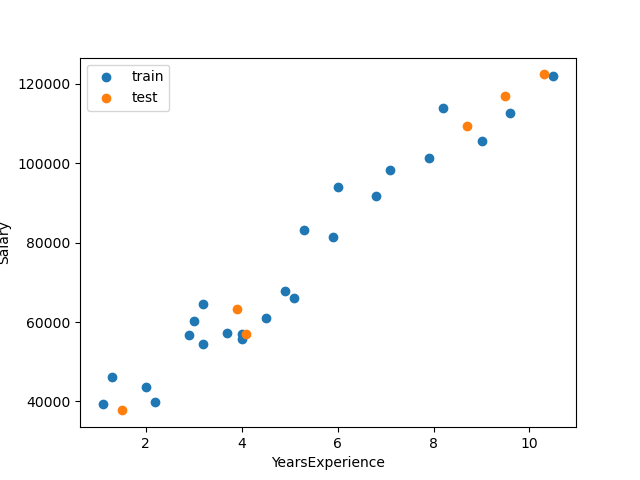

In [8]:
# visualización de los datos: train and test
plt.figure()
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.xlabel(variable_name[0])
plt.ylabel(variable_name[1])
plt.legend(['train', 'test'])

Creamos la función `cost_function` que calcula la expresión a optimizar $J(w,b)$

In [9]:
def cost_function(x, w, b, y):    
    n = x.shape[0]
    cost_sum = 0
    for i in range(n):
        f = w * x[i] + b
        cost = (f-y[i])**2
        cost_sum = cost_sum + cost
    total_cost = (1/(2*n))* cost_sum
    return total_cost

Creamos la función `gradient`que clacula las expresiones análiticas de $\frac{\partial J}{\partial w}$ y $\frac{\partial J}{\partial b}$

In [10]:
def gradient(x, w, b, y):
    
    n = x.shape[0]
    djdw = 0
    djdb = 0
    
    for i in range(n):
        djdw_i = (w*x[i]+b-y[i])*x[i]
        djdb_i = (w*x[i]-y[i])
        djdw = djdw + djdw_i
        djdb = djdb + djdb_i
    
    djdw = djdw/n
    djdb = djdb/n
    
    return djdw, djdb    

Implementamos el algoritmo descento del gradiente mediante la función `gradient_descent`. Esta función llama a `gradient`para cualcular el gradiente y `cost_function` para calcular la función de costo.

In [11]:
def gradient_descent(x, y, w0, b0, alpha, n_iter, cost_function, gradient_function):
    
    J_history = []
    w_history = []
    b_history = []
    w = w0
    b = b0
    
    for i in range(n_iter):
        djdw, djdb = gradient_function(x, w, b, y)
        
        # actulización parámetros - gradient descent equation
        w = w - alpha * djdw
        b = b - alpha * djdb
        
        # almacenamiento de la evolución de la cost fuction y los parámetros w y b
        if i <10000: 
            J = cost_function(x, w, b, y)
            J_history.append(J)
            w_history.append(w)
            b_history.append(b)
            
        if i% math.ceil(n_iter/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {djdw: 0.3e}, dj_db: {djdb: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    
    return w, b, J_history, w_history, b_history

## Solución del problema

In [17]:
# definir valores iniciales de w y b
w0 = 2000 
b0 = 5000
iteration = 1500 # número de iteraciones
alpha = 1.0e-4 # parámetro learning rate

w_opt, b_opt, J_hist, w_hist, b_hist = gradient_descent(x_train, y_train, w0, 
                                                b0, alpha, iteration,
                                                cost_function, gradient)
print(f"(w,b) found by gradient descent: ({w_opt:8.4f},{b_opt:8.4f})")

Iteration    0: Cost 1.91e+09  dj_dw: -3.461e+05, dj_db: -6.377e+04   w:  2.035e+03, b: 5.00638e+03
Iteration  150: Cost 7.43e+08  dj_dw: -2.100e+05, dj_db: -4.306e+04   w:  6.114e+03, b: 5.79372e+03
Iteration  300: Cost 3.10e+08  dj_dw: -1.272e+05, dj_db: -3.051e+04   w:  8.588e+03, b: 6.33705e+03
Iteration  450: Cost 1.50e+08  dj_dw: -7.677e+04, dj_db: -2.291e+04   w:  1.008e+04, b: 6.73257e+03
Iteration  600: Cost 9.10e+07  dj_dw: -4.606e+04, dj_db: -1.834e+04   w:  1.099e+04, b: 7.03887e+03
Iteration  750: Cost 6.89e+07  dj_dw: -2.736e+04, dj_db: -1.561e+04   w:  1.152e+04, b: 7.29163e+03
Iteration  900: Cost 6.04e+07  dj_dw: -1.597e+04, dj_db: -1.400e+04   w:  1.184e+04, b: 7.51255e+03
Iteration 1050: Cost 5.69e+07  dj_dw: -9.024e+03, dj_db: -1.307e+04   w:  1.202e+04, b: 7.71489e+03
Iteration 1200: Cost 5.53e+07  dj_dw: -4.789e+03, dj_db: -1.256e+04   w:  1.212e+04, b: 7.90670e+03
Iteration 1350: Cost 5.43e+07  dj_dw: -2.202e+03, dj_db: -1.230e+04   w:  1.217e+04, b: 8.09291e+03


Text(0.5, 1.0, '$b$')

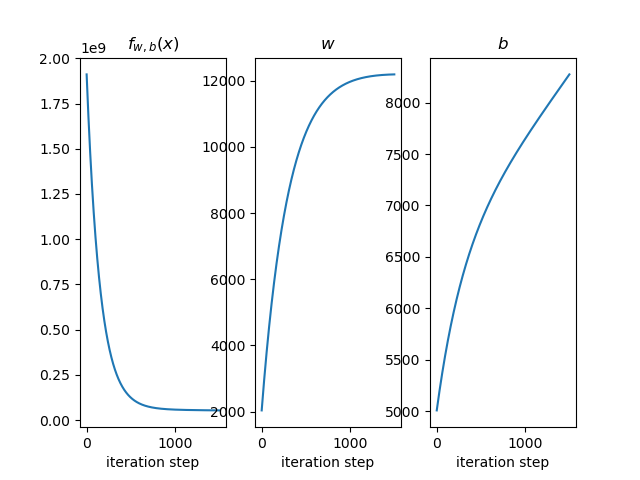

In [18]:
# evolución función de costo, w y b
iteration_step = np.arange(len(J_hist))

plt.figure()
plt.subplot(1,3,1)
plt.plot(iteration_step, J_hist)
plt.xlabel('iteration step')
plt.title(r'$f_{w,b}(x)$')
plt.subplot(1,3,2)
plt.plot(iteration_step, w_hist)
plt.xlabel('iteration step')
plt.title(r'$w$')
plt.subplot(1,3,3)
plt.plot(iteration_step, b_hist)
plt.xlabel('iteration step')
plt.title(r'$b$')

In [19]:
# evaluaciones el modelo con los parámetros w y b optimos.
y_model = linear_model(x_train, w_opt, b_opt)
J = cost_function(x_train, w_opt, b_opt, y_train)
print(J)

53490841.22633661


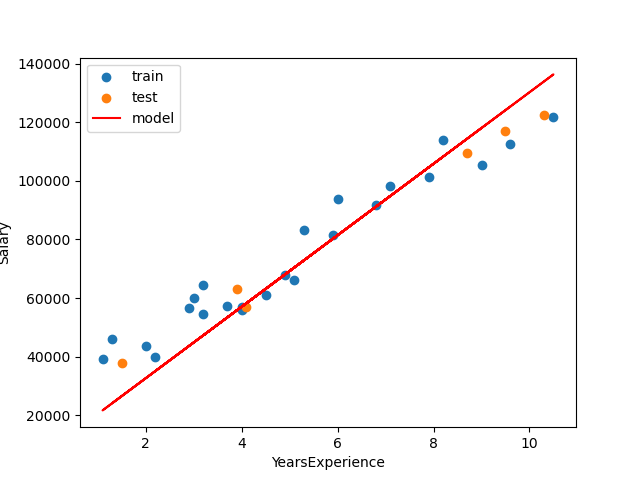

In [20]:
# visualización de los datos: train and test y el modelo.
plt.figure()
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x_train, y_model, color = 'red')
plt.xlabel(variable_name[0])
plt.ylabel(variable_name[1])
plt.legend(['train', 'test', 'model'])

## Solución gráfica

In [21]:
w = np.linspace(-120000, 120000, 500)
b = np.linspace(-6000, 6000, 500)

W, B = np.meshgrid(w,b)
n_rows, n_columns = W.shape
J = np.zeros([n_rows, n_columns])
for i in range(n_rows):
    for k in range(n_columns):
        J[i,k] = cost_function(x_train, W[i,k], B[i,k], y_train)

Text(0.5, 0, ' $J(w,b)$')

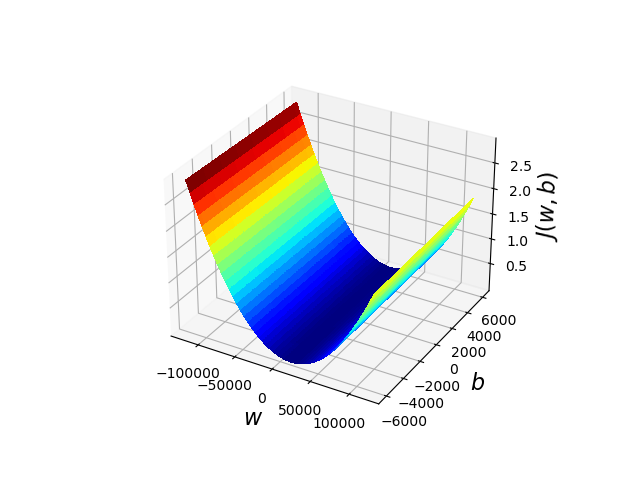

In [22]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(W, B, J, cmap=cm.jet,
                       linewidth=0, antialiased=False)

ax.set_xlabel(xlabel = ' $w$', fontsize = 16)
ax.set_ylabel(ylabel = ' $b$', fontsize = 16)
ax.set_zlabel(zlabel = ' $J(w,b)$', fontsize = 16)

## Solución con librería scipy

In [23]:
from scipy.optimize import minimize

Se debe modificar la función `cost_function` ya que las variables de decisión de la función de costo que utiliza `minimize` debe estar en forma vectorial y debe ser el primer argumento de la función.

In [24]:
def cost_function_(par, x, y): 
    
    # par es un array de dimension 2, donde el primer elemento es w y el segundo es b
    w = par[0] 
    b = par[1]
    
    n = x.shape[0]
    cost_sum = 0
    for i in range(n):
        f = w * x[i] + b
        cost = (f-y[i])**2
        cost_sum = cost_sum + cost
    total_cost = (1/(2*n))* cost_sum
    return total_cost

In [25]:
x0 = np.array([0,0]) # valor inicial de iteración
res = minimize(cost_function_, x0 = x0, method = 'SLSQP', args = (x_train, y_train), options = {'disp':True})

Optimization terminated successfully    (Exit mode 0)
            Current function value: 18074835.08555136
            Iterations: 6
            Function evaluations: 20
            Gradient evaluations: 6


In [26]:
w_opt2, b_opt2 =res.x
J2 = res.fun
print(f' J(w,b) - descenso gradiente = {J} - scipy = {J2}')
print(f' w - desceno gradiente = {w_opt} - scipy = {w_opt2}')
print(f' b - desceno gradiente = {b_opt} - scipy = {b_opt2}')

 J(w,b) - descenso gradiente = [[2.91704770e+11 2.89622463e+11 2.87547619e+11 ... 1.76551559e+11
  1.78177935e+11 1.79811773e+11]
 [2.91688252e+11 2.89606004e+11 2.87531218e+11 ... 1.76564119e+11
  1.78190553e+11 1.79824450e+11]
 [2.91671735e+11 2.89589545e+11 2.87514817e+11 ... 1.76576679e+11
  1.78203172e+11 1.79837127e+11]
 ...
 [2.83566597e+11 2.81513367e+11 2.79467599e+11 ... 1.82864842e+11
  1.84520295e+11 1.86183211e+11]
 [2.83550366e+11 2.81497195e+11 2.79451486e+11 ... 1.82877689e+11
  1.84533201e+11 1.86196175e+11]
 [2.83534136e+11 2.81481023e+11 2.79435373e+11 ... 1.82890536e+11
  1.84546106e+11 1.86209139e+11]] - scipy = 18074835.08555136
 w - desceno gradiente = 12195.054788732521 - scipy = 9312.49620275913
 b - desceno gradiente = 8275.300102454306 - scipy = 26780.605070501173


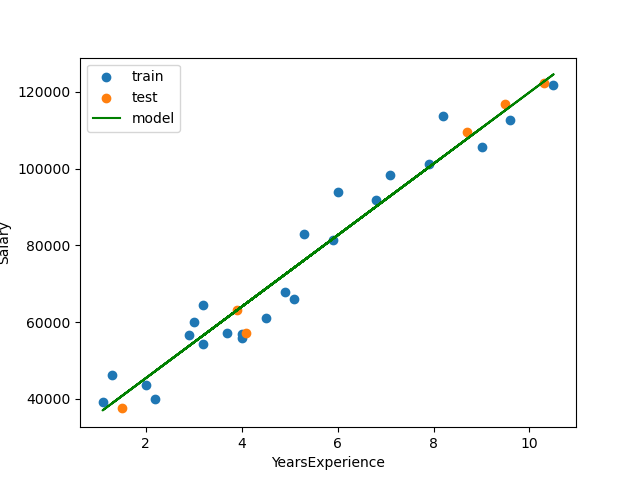

In [27]:
# visualización de los datos: train and test y el modelo.
y_model2 = w_opt2*x_train + b_opt2

plt.figure()
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
#plt.plot(x_train, y_model, color = 'red')
plt.plot(x_train, y_model2, color = 'green')
plt.xlabel(variable_name[0])
plt.ylabel(variable_name[1])
plt.legend(['train', 'test', 'model'])